# 4 Time series 

__Roadmap of time series analysis__

__Part 1 Random walk approach:__

<img src="img/img1.png" alt="1" title="Random walk approach" class="bg-primary mb-1" width="500px">

__Part 2 ARIMA approach:__

<img src="img/img2.png" alt="1" title="ARIMA approach" class="bg-primary mb-1" width="400px">

## 4.1 Fundamentals of time series analysis

A __time series__ is a collection of data points ordered in time index. Typically, these data points are spaced at consistent intervals, such as hourly, monthly, or yearly.

__Time series decomposition__ is a process by which we separate a time series into its components: trend, seasonality, and residuals.

**The trend** represents the slow-moving changes in a time series. It is responsible for making the series gradually increase or decrease over time.

**The seasonality** component represents the seasonal pattern in the series. The cycles occur repeatedly over a fixed period of time.

**The residuals** represent the behavior that cannot be explained by the trend and seasonality components. They correspond to random errors, also termed white noise.

### 4.1.1 Random walk

A random walk is a process in which there is an equal chance of going up or down by a random number. 

In other words, a random walk is a series whose first difference is stationary and uncorrelated, which means that the process moves completely at random.

**Note:** Because a random process takes random steps into the future, we cannot use statistical or deep learning techniques to fit such a process, i.e., there is no pattern to learn from randomness, and it cannot be predicted.

Instead, we rely on naive forecasting methods (df.shift()).

### 4.1.2 Stationarity

A stationary time series is one whose statistical properties do not change over time. 

In other words, it has a constant mean, variance, and auto-correlation, and these properties are independent of time.

__Some models assume stationarity:__ **The moving average model (MA), autoregressive model (AR), and autoregressive moving average model(ARMA).** 

__Augmented Dickey-Fuller (ADF) test__

The augmented Dickey-Fuller (ADF) test helps us determine if a time series is stationary by testing for the presence of a unit root. 

If a unit root is present, the time series is not stationary.  

The null hypothesis states that a unit root is present, meaning that our time series is not stationary.

- **$p < 0.05$ --> Reject null hypothesis (time series is not stationary) --> Time series is stationary**
- **$p > 0.05$ --> Accept (cannot reject) null hypothesis (time series is not stationary) --> Time series is not stationary**

In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

__You can download the sample data from [here](https://hullacuk-my.sharepoint.com/:x:/g/personal/tongxin_chen_hull_ac_uk/EVTluUHhUT1HrBSp0gnNTZgBRspwhST-4s9NO5Dx6-ifyQ?e=WBFoVh).__

Download the data file and place it in the same folder as this Jupyter Notebook.

In [8]:
# load the sample data
df_data = pd.read_csv('ts_sample_data.csv', index_col=0)

In [9]:
df_data

date   data
0   2021-01-01   0.71
1   2021-01-02   0.63
2   2021-01-03   0.85
3   2021-01-04   0.44
4   2021-01-05   0.61
..         ...    ...
79  2021-03-21   9.99
80  2021-03-22  16.20
81  2021-03-23  14.67
82  2021-03-24  16.02
83  2021-03-25  11.61

[84 rows x 2 columns]

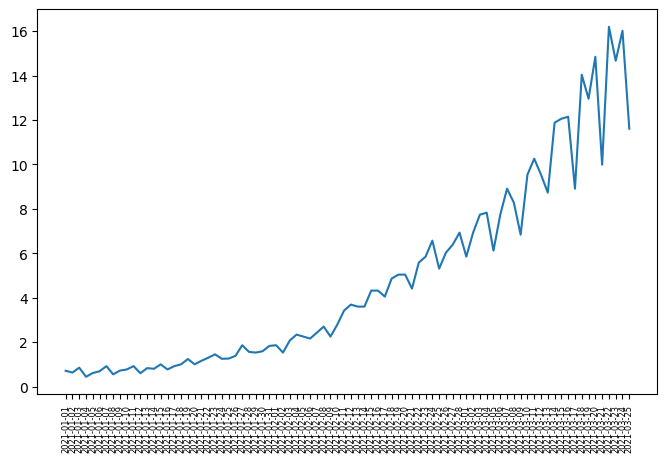

In [10]:
# plot the time series data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(df_data.date.values, df_data.data.values)
plt.xticks(fontsize=6, rotation=90)  # Adjust font size and rotation angle
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
# ADF test
ADF_result = adfuller(df_data.data)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 2.7420165734574753
p-value: 1.0


__Interpretation:__ The p-value greater than 0.05, we accept (cannot reject) the null hypothesis, so time series is __not__ stationary.

### 4.1.3 Differencing

__One-Step differencing__

In [13]:
diff_data1 = np.diff(df_data.data, n=1) # n=1 is one-step

In [14]:
print(df_data.data.values)

[ 0.71      0.63      0.85      0.44      0.61      0.69      0.92
  0.55      0.72      0.77      0.92      0.6       0.83      0.8
  1.        0.77      0.92      1.        1.24      1.        1.16
  1.3       1.45      1.25      1.26      1.38      1.86      1.56
  1.53      1.59      1.83      1.86      1.53      2.07      2.34
  2.25      2.16      2.43      2.7       2.25      2.79      3.42
  3.69      3.6       3.6       4.32      4.32      4.05      4.86
  5.04      5.04      4.41      5.58      5.85      6.57      5.31
  6.03      6.39      6.93      5.85      6.93      7.74      7.83
  6.12      7.74      8.91      8.28      6.84      9.54     10.26
  9.54      8.729999 11.88     12.06     12.15      8.91     14.04
 12.96     14.85      9.99     16.2      14.67     16.02     11.61    ]


In [15]:
print(diff_data1) # -0.08 = 0.63(y_t) - 0.71(y_t-1)

[-0.08      0.22     -0.41      0.17      0.08      0.23     -0.37
  0.17      0.05      0.15     -0.32      0.23     -0.03      0.2
 -0.23      0.15      0.08      0.24     -0.24      0.16      0.14
  0.15     -0.2       0.01      0.12      0.48     -0.3      -0.03
  0.06      0.24      0.03     -0.33      0.54      0.27     -0.09
 -0.09      0.27      0.27     -0.45      0.54      0.63      0.27
 -0.09      0.        0.72      0.       -0.27      0.81      0.18
  0.       -0.63      1.17      0.27      0.72     -1.26      0.72
  0.36      0.54     -1.08      1.08      0.81      0.09     -1.71
  1.62      1.17     -0.63     -1.44      2.7       0.72     -0.72
 -0.810001  3.150001  0.18      0.09     -3.24      5.13     -1.08
  1.89     -4.86      6.21     -1.53      1.35     -4.41    ]


In [16]:
# ADF test for diff data
ADF_result = adfuller(diff_data1)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.4074097636380228
p-value: 0.9088542416911345


__Two-Step differencing__ as p > 0.05 (still non-stationary) after one-step

In [17]:
diff_data2 = np.diff(df_data.data, n=2) # n=2 is two-step

In [18]:
print(diff_data1) # one-step series

[-0.08      0.22     -0.41      0.17      0.08      0.23     -0.37
  0.17      0.05      0.15     -0.32      0.23     -0.03      0.2
 -0.23      0.15      0.08      0.24     -0.24      0.16      0.14
  0.15     -0.2       0.01      0.12      0.48     -0.3      -0.03
  0.06      0.24      0.03     -0.33      0.54      0.27     -0.09
 -0.09      0.27      0.27     -0.45      0.54      0.63      0.27
 -0.09      0.        0.72      0.       -0.27      0.81      0.18
  0.       -0.63      1.17      0.27      0.72     -1.26      0.72
  0.36      0.54     -1.08      1.08      0.81      0.09     -1.71
  1.62      1.17     -0.63     -1.44      2.7       0.72     -0.72
 -0.810001  3.150001  0.18      0.09     -3.24      5.13     -1.08
  1.89     -4.86      6.21     -1.53      1.35     -4.41    ]


In [19]:
print(np.array([f"{_:.2f}" for _ in diff_data2])) # 0.30 = 0.22(y_k) - (-0.08)(y_k-1): k is one-step series index

['0.30' '-0.63' '0.58' '-0.09' '0.15' '-0.60' '0.54' '-0.12' '0.10'
 '-0.47' '0.55' '-0.26' '0.23' '-0.43' '0.38' '-0.07' '0.16' '-0.48'
 '0.40' '-0.02' '0.01' '-0.35' '0.21' '0.11' '0.36' '-0.78' '0.27' '0.09'
 '0.18' '-0.21' '-0.36' '0.87' '-0.27' '-0.36' '0.00' '0.36' '0.00'
 '-0.72' '0.99' '0.09' '-0.36' '-0.36' '0.09' '0.72' '-0.72' '-0.27'
 '1.08' '-0.63' '-0.18' '-0.63' '1.80' '-0.90' '0.45' '-1.98' '1.98'
 '-0.36' '0.18' '-1.62' '2.16' '-0.27' '-0.72' '-1.80' '3.33' '-0.45'
 '-1.80' '-0.81' '4.14' '-1.98' '-1.44' '-0.09' '3.96' '-2.97' '-0.09'
 '-3.33' '8.37' '-6.21' '2.97' '-6.75' '11.07' '-7.74' '2.88' '-5.76']


In [20]:
# ADF test for diff data
ADF_result = adfuller(diff_data2)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -3.5851628747931454
p-value: 0.006051099869603866


__Interpretation:__ Two-step differencing turn the time series to stationary as p < 0.05.

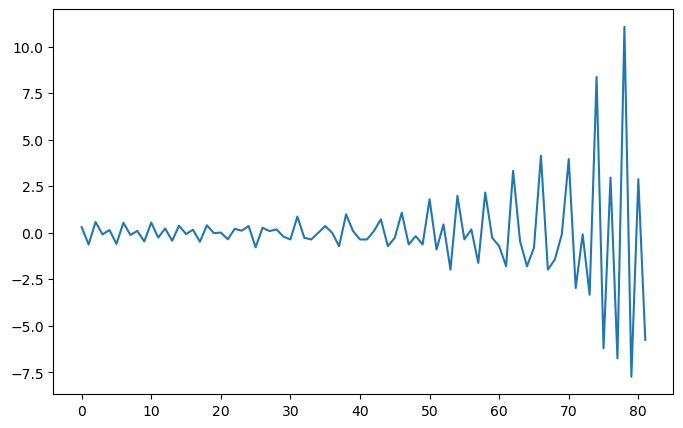

In [21]:
# plot the two-step differencing time series data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(diff_data2)
plt.show()

### 4.1.4 The autocorrelation function (ACF)<a name="autocorrelation-function-acf"></a>

The autocorrelation function (ACF) measures the linear relationship between lagged values of a time series.

In other words, it measures the __correlation (covariance) of the time series with itself (variance)__.

The **ACF** can be denoted as:

$\rho_k = \frac{\gamma_k}{\gamma_0}$

where $\gamma_0$ is the variance of the time series $\gamma_0 = \text{Var}(x_t)$ and $\gamma_k$ is the autocovariance.

The autocovariance function $\gamma_k$  at lag $k$ is given by:
 
$ \gamma_k  = \text{Cov}(x_t, x_{t-k}) = \frac{1}{N} \sum_{t=k+1}^{N} (x_t - \mu)(x_{t-k} - \mu)$

- $k$ is the lag;
- $x_t$ is the value at time $t$;
- $x_{t-k}$  is the value at time $t-k$;
- $\mu$ is the mean of the time series;
- $N$ is the number of observations. 

__This is an example for calculating ACF (lag=2 --> k=2) for [1,3,5,7,8]__

- $\mu = (1+3+5+7+8)/5 = 24/5 = 4.8$
- Numerator: $\gamma_2 = \text{Cov}(x_t, x_{t-2}) = \frac{1}{5} \sum_{t=3}^{5} (x_t - 4.8)(x_{t-2} - \mu) = ((5-4.8)*(1-4.8)+(7-4.8)*(3-4.8)+(8-4.8)*(5-4.8))/5 = -0.816$ 
- Denominator: $\gamma_0 = ((1-4.8)^2+(3-4.8)^2+(5-4.8)^2+(7-4.8)^2+(8-4.8)^2)/5=6.56$
- $\rho_2 = -0.816 / 6.56 =-0.124$

In [22]:
# Use the acf function in statsmodels for calculating this example
from statsmodels.tsa.stattools import acf
acf_values = acf([1,3,5,7,8], nlags=2)
for lag, value in enumerate(acf_values):
    print(f"Lag {lag}: {value}")

Lag 0: 1.0
Lag 1: 0.42560975609756097
Lag 2: -0.12439024390243904


In [23]:
from statsmodels.graphics.tsaplots import plot_acf

__Interpretation for ACF plot__
- X-Axis: Displays the lag values.
- Y-Axis: Displays the autocorrelation values (coefficients) ranging from -1 to 1.
- Note that the shaded area represents a confidence interval. 
- If a point is within the shaded area, then it is not significantly different from 0.
- Otherwise, the autocorrelation coefficient is significant.

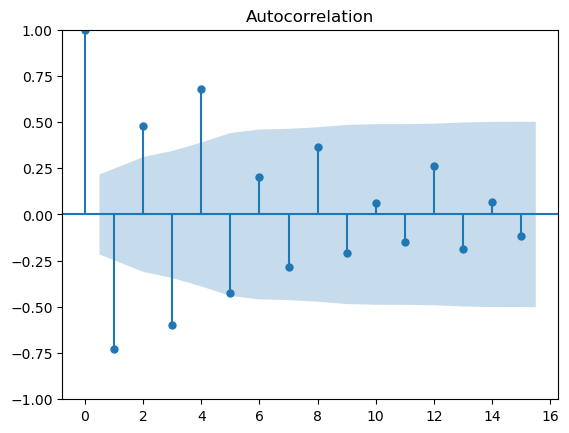

In [24]:
# for the ACF plot for df_data.data after two-step differencing, the value is still auto-correlated before lag 5,
# which means diff_data2 is not a random work as it still obtains the auto-correlations.
# we can conclude that df_data is not a random walk (so we may need some models to modeling the patterns).
plot_acf(diff_data2.data,lags=15)
plt.show()

## 4.2 MA($q$), AR($p$),ARMA ($p$,$q$) models

### 4.2.1 Moving average model (MA) -- ($q$) -- using ACF

In a moving average (MA) process, the current value depends linearly on the __mean__ of the series, the __current error__ term, and __past error__ terms. 

The moving average model is denoted as MA($q$), where $q$ is the order. 

The general expression of an MA($q$) model is:

$$ y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} $$

- The present ($t$) error term $\epsilon_t$ , and past error terms $\epsilon_{t-q}$ ;
- The magnitude of the impact of past errors on the present value is quantified using a coefficient denoted as $\theta_q$ .

### 4.2.2 Autoregressive model (AR) -- ($p$) -- using PACF 

An autoregressive process is a regression of a variable against itself. 

In a time series, this means that the present value is __linearly dependent on__ its __past values__. 

The autoregressive process is denoted as AR($p$), where $p$ is the order. 

The general expression of an AR($p$) model is:

$$y_t = C + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t$$

- A constant $C$;
- The present error term $\epsilon_t$ , which is also white noise;
- The past values of the series $y_{t-p}$;
- The magnitude of the influence of the past values on the present value is denoted as $\phi_p$, which represents the coefficients of the AR ($p$) model. 


__Partial autocorrelation function (PACF)__ 

It measures the correlation between __lagged values__ in a time series __when we remove the influence of the intermediate lags__. 

It essentially gives the partial correlation of a time series with its own lagged values, controlling for the effect of other lags.

We can plot the partial autocorrelation function to determine the order of a stationary AR($p$) process. 

The coefficients will be non-significant after lag $p$.

We can use the Yule-Walker Equations to compute PACF recursively:

$\phi_{kk} = \frac{\rho_k - \sum_{j=1}^{k-1} \phi_{k-1,j} \rho_{k-j}}{1 - \sum_{j=1}^{k-1} \phi_{k-1,j} \rho_j}$

- $k$: The current lag at which the PACF is being computed.
- $j$: An intermediate lag index used in the summation to remove the influence of previous lags.

So, the PACF at lag $k$ is given by: $\phi_{kk} = \text{corr}(x_t, x_{t-k} \mid x_{t-1}, x_{t-2}, ..., x_{t-k+1})$

This means PACF at lag $k$ is the correlation between $x_t$ and $x_{t-k}$ after removing the effect of lags $ 1 $ to $ k-1 $ (i.e., removing the influence of $x_{t-1}, x_{t-2}, ..., x_{t-k+1}$).

__This is an example for calculating PACF (lag=2 --> k=2) for [1,3,5,7,8]__

-  for $k=2$, $\phi_{22} = \frac{\rho_2 - \sum_{j=1}^{1} \phi_{11} \rho_{1}}{1 - \sum_{j=1}^{1} \phi_{11} \rho_1}$ = $\frac{\rho_2 - \phi_{11} \rho_{1}}{1 - \phi_{11} \rho_1}$
-  for $k=1$, we get $\phi_{11} = \rho_1$
-  so, $\frac{\rho_2 - \phi_{11} \rho_{1}}{1 - \phi_{11} \rho_1}$ = $\frac{\rho_2 -  (\rho_{1})^2}{1 - {\rho_1}^2}$ = $\frac{ -0.124 - (0.426)^2}{1 - (0.426)^2}$ = -0.373

In [25]:
# Use the PACF function in statsmodels for calculating this example
from statsmodels.tsa.stattools import pacf
pacf_values = pacf([1,3,5,7,8], nlags=2, method='ywm') 
for lag, value in enumerate(pacf_values):
    print(f"Lag {lag}: {value}")

Lag 0: 1.0
Lag 1: 0.425609756097561
Lag 2: -0.37312272633985905


In [26]:
from statsmodels.graphics.tsaplots import plot_pacf

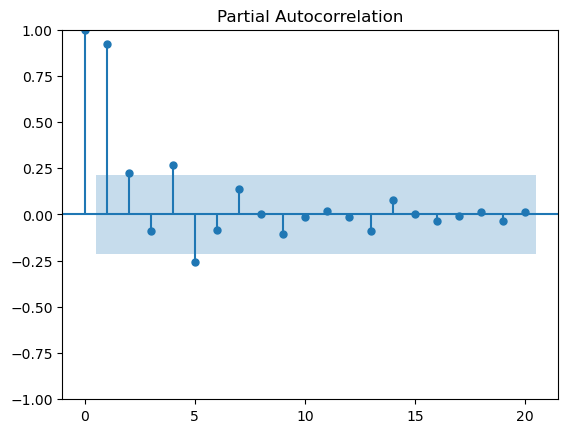

In [27]:
# Plot partial autocorrelation
plot_pacf(df_data.data, lags=20)
plt.show()

### 4.2.3 Autoregressive moving average model (ARMA) -- ($p$, $q$)

The autoregressive moving average process is a combination of the autoregressive process and the moving average process.

It is denoted as ARMA($p$,$q$), where $p$ is the order of the autoregressive process, and $q$ is the order of the moving average process. 

The general equation of the ARMA($p$,$q$)model is:

$$y_t = C + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

Note:

- An ARMA($0,q$) process is equivalent to an MA($q$) process, since the order $p = 0$ cancels the AR($p$) portion. 

- An ARMA($p,0$) process is equivalent to an AR($p$) process, since the order $q = 0$ cancels the MA($q$) portion.

## 4.3 ARIMA -- ($p$, $d$, $q$)

__An autoregressive integrated moving average (ARIMA) model__ is the combination of the AR($p$) and MA($q$) processes, but in terms of the differenced series.

It is denoted as ARIMA($p,d,q$), where $p$ is the order of the AR($p$) process, $d$ is the order of integration, and $q$ is the order of the MA($q$) process.

__Integration__ is the reverse of differencing, and the order of integration $d$ is equal to **the number of times the series has been differenced** to be rendered stationary. 

The general equation of the ARIMA($p,d,q$) process is:

$y'_t = \Delta^d y_t$


$y'_t = C + \phi_1 y'_{t-1} + \dots + \phi_p y'_{t-p} + \theta_1 \epsilon'_{t-1} + \dots + \theta_q \epsilon'_{t-q} + \epsilon_t$


Note that $y'_t$ represents the differenced series after $d$ times, and it may have been differenced more than once.

__The Akaike information criterion (AIC)__ is a measure of the quality of a model in relation to other models. 

It is used for model selection.

The AIC is a function of the number of parameters $k$ in a model and the maximum value of the likelihood function $\hat{L}$:

$$ \text{AIC} = 2k - 2 \ln(\hat{L}) $$

The lower the value of the AIC, the better the model. 

Selecting according to the AIC allows us to keep a balance between the complexity of a model and its goodness of fit to the data.

__[SARIMAX](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)__  **is a complex algorithm that allows us to consider seasonal effects, autoregressive processes, non-stationary time series, moving average processes, and exogenous variables all in a single model.**

__Key parameters for ARIMA model in SARIMAX algorithm:__

- endog: time series y 
- order: (p, d, q)

__Step1: Set optimization function for ARIMA parameter tuning using AIC__

In [28]:
from typing import Union
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_arima(endog: Union[pd.Series, list], orders_list: list, d_value: int):
    results = []
    for order in orders_list:
        try:
            train_model = SARIMAX(endog, order=(order[0], d_value, order[1]), simple_differencing=False).fit(disp=False)
            aic = train_model.aic
            results.append([order, aic])
        except Exception as e:
            # Print or log the exception if needed
            print(f"Error encountered for order {order}: {str(e)}")
            continue

    # Convert results to DataFrame and sort by AIC
    results_df = pd.DataFrame(results, columns=['(p,q)', 'AIC'])
    results_df = results_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return results_df

__Step2: Set parameter ranges__

In [29]:
from itertools import product
ps = range(0, 4, 1) # set p range 
qs = range(0, 4, 1) # set q range 
d = 2 # set d (this can be range as well)
order_list = list(product(ps, qs))
print(order_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


__Step3: Training__

In [30]:
# training set and testing set
train_data = df_data.data[:-4]
test_data = df_data.data[-4:]

In [31]:
%%time

import warnings
warnings.filterwarnings('ignore')

result_df = optimize_arima(train_data, order_list, d)

CPU times: user 847 ms, sys: 3.64 s, total: 4.49 s
Wall time: 465 ms


In [32]:
result_df

(p,q)         AIC
0   (3, 3)  115.269292
1   (3, 1)  115.624980
2   (3, 2)  115.672007
3   (3, 0)  154.430620
4   (0, 3)  194.654716
5   (0, 2)  209.274665
6   (2, 3)  220.666852
7   (1, 3)  228.267799
8   (1, 2)  228.935784
9   (2, 2)  229.974696
10  (2, 1)  234.501112
11  (1, 1)  236.117233
12  (0, 1)  252.601022
13  (2, 0)  280.299907
14  (1, 0)  280.389386
15  (0, 0)  320.324435

__Step4: Selecting the best p,d,q for ARIMA__

In [33]:
model = SARIMAX(train_data, order=(3,2,3), simple_differencing=False) # Selecting the best p,d,q for ARIMA
model_fit = model.fit(disp=False) 

__Step5: Residual analysis/diagnosis__

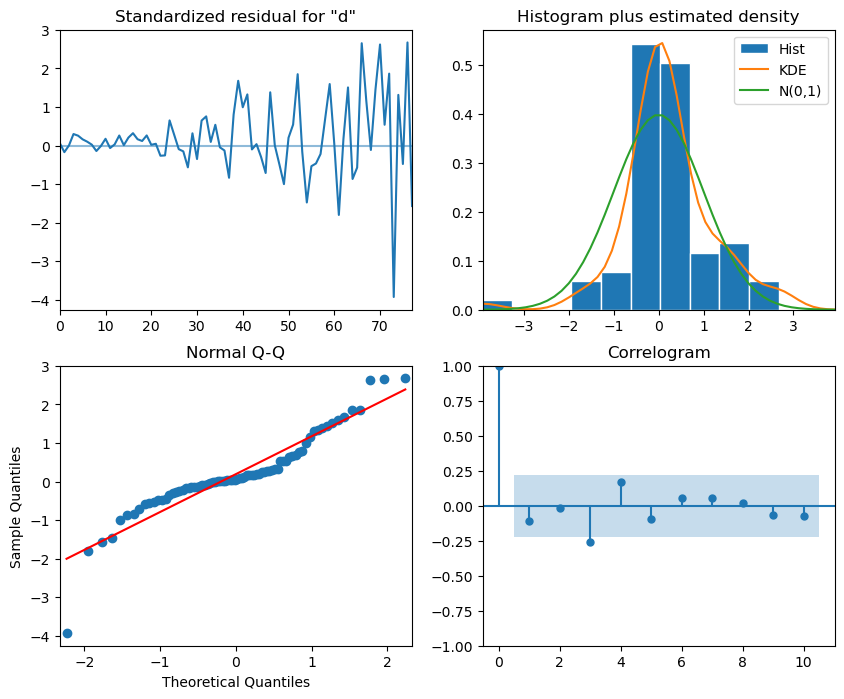

In [34]:
# plot_diagnostics
model_fit.plot_diagnostics(figsize=(10,8)) 
plt.show()

__Interpretation:__

- The top-left plot shows the residuals over time: While there is no trend in the residuals, the variance does not seem to be constant, which is a discrepancy in comparison to white noise.

- The top-right histogram shows the distribution of the residuals. The distribution is not perfectly normal, but it is close to normal, which is a good sign.

- The Q-Q plot leads us to the same conclusion, as it displays a line that is fairly straight, meaning that the residuals distribution is close to a normal distribution (also shown as top-right histogram).

- The correlogram at the bottom right shows no significant coefficients after lag 0, just like white noise, though a coefficient seems to be significant at lag 3 (There are no significant autocorrelation coefficients before this lag, so it can be assumed that is due to chance).

__Ljung-Box test__ is used to determine whether the residuals are correlated.We will apply the test on the first 10 lags and study the p-values. If all p-values are greater than 0.05, we cannot reject the null hypothesis, and we’ll conclude that the residuals are not correlated, just like white noise.

In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
residuals = model_fit.resid
df_al = acorr_ljungbox(residuals, np.arange(1, 11, 1)) ## 10 lags 
df_al['lags'] = np.arange(1, 11, 1)

In [36]:
df_al

lb_stat  lb_pvalue  lags
1    1.643993   0.199778     1
2    1.647603   0.438760     2
3    7.291150   0.063175     3
4    9.241503   0.055339     4
5    9.861096   0.079268     5
6   10.096287   0.120655     6
7   10.342120   0.170000     7
8   10.376459   0.239591     8
9   10.717872   0.295544     9
10  11.164460   0.344849    10

__Step6: Forecasting and testing__

In [37]:
df_data

date   data
0   2021-01-01   0.71
1   2021-01-02   0.63
2   2021-01-03   0.85
3   2021-01-04   0.44
4   2021-01-05   0.61
..         ...    ...
79  2021-03-21   9.99
80  2021-03-22  16.20
81  2021-03-23  14.67
82  2021-03-24  16.02
83  2021-03-25  11.61

[84 rows x 2 columns]

In [38]:
# In our case, we use the previous 80 days to train the model and predict the last 4 days. 
ARIMA_pred = model_fit.get_prediction(80, 83).predicted_mean # model_fit.forecast(steps=4)

In [39]:
ARIMA_pred

80    15.854711
81    14.380938
82    16.367480
83    11.682536
Name: predicted_mean, dtype: float64

In [40]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_data.date[:-4].values, train_data.values, color='skyblue', lw=1.5, marker='o', markersize=4, label='Train Data')
plt.plot(df_data.date[-4:].values, test_data.values, color='royalblue', lw=1.5, marker='o',markersize=4,label='Actual Data')
plt.plot(df_data.date[-4:].values, ARIMA_pred.values, color='orange',lw=1, marker='o', markersize=5, label='Prediction Data')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time series forecasting using ARIMA')
plt.legend(frameon=False)
plt.axvspan(80,83, alpha=0.1)
plt.xticks(fontsize=6, rotation=90)  # Adjust font size and rotation angle
plt.show()

__Some other metrics: MAPE, MSE__

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [42]:
# ARIMA Vs Naive(use former values represent the predicted values)
naive_pred = df_data.data[76:80]

# Calculate Mean Squared Error (MSE)
mse_a = mean_squared_error(test_data, ARIMA_pred)
mse_n = mean_squared_error(test_data, naive_pred)
print(f"ARIMA Mean Squared Error (MSE): {mse_a}", f"Naive Mean Squared Error (MSE): {mse_n}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape_a = mean_absolute_percentage_error(test_data, ARIMA_pred)
mape_n = mean_absolute_percentage_error(test_data, naive_pred)
print(f"ARIMA Mean Absolute Percentage Error (MAPE): {mape_a}", f" Naive Mean Absolute Percentage Error (MAPE): {mape_n}")

ARIMA Mean Squared Error (MSE): 0.08219636088010844 Naive Mean Squared Error (MSE): 2.8957499999999987
ARIMA Mean Absolute Percentage Error (MAPE): 0.017239139124687667  Naive Mean Absolute Percentage Error (MAPE): 0.11561658552433654


## 4.4 SARIMA($p,d,q$)($P,D,Q$)$m$

__Seasonal autoregressive integrated moving average (SARIMA) model__ adds seasonal parameters to the ARIMA(p,d,q) model.

It is denoted as SARIMA($p,d,q$)($P,D,Q$)$m$, where 

- $P$ is the order of the seasonal AR($P$) process; 

- $D$ is the __seasonal order of integration__; 

- $Q$ is the order of the seasonal MA($Q$)process; 

- $m$ is the frequency or the number of **observations per seasonal cycle**.

__Note__ that a SARIMA($p,d,q$)($0,0,0$)$m$ model is equivalent to an ARIMA($p,d,q$) model.

### 4.4.1 What is frequency $m$?

**Appropriate frequency $m$ depending on the data:**

| Data collection | Frequency $m$ (observation unit/level) |
|-----------------|-----------------------------------------|
| Annual          | 1                                       |
| Quarterly       | 4                                       |
| Monthly         | 12                                      |
| Weekly          | 52                                      |
| Daily           | 365                                     |
| Hourly          | 8760                                    |

__You can download the sample data from [here](https://hullacuk-my.sharepoint.com/:x:/g/personal/tongxin_chen_hull_ac_uk/EbNH-DBkOilKu_hZsZUoXt8BLwPVb5jDtBRmIQEpXEdgkw?e=w1boxf).__

Download the data file and place it in the same folder as this Jupyter Notebook.

In [43]:
# use the air passengers data for analysis
df_ap = pd.read_csv('air-passengers.csv', index_col=0)

In [44]:
df_ap.head()

Passengers
Month              
1949-01         112
1949-02         118
1949-03         132
1949-04         129
1949-05         121

In [45]:
# set index to datetime type
df_ap.index = pd.to_datetime(df_ap.index)

__Plotting the time series data helps to observe periodic patterns (frequency).__

In [46]:
# Plot the time series
df_ap.plot(figsize=(10, 8), legend=False)

# Add vertical lines for each year
years = pd.to_datetime(df_ap.index.year.unique().values, format='%Y')
for year in years:
    plt.axvline(x=year, color='grey', linestyle='--', alpha=0.7)

plt.xticks(years, labels=df_ap.index.year.unique().values)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Numbers of Passengers', fontsize=15)
plt.show()

__Another way of identifying seasonal patterns is using time series decomposition.__

**Note:** In a time series without a seasonal pattern, the decomposition process will show the seasonal component as a flat horizontal line at 0.

In [47]:
## decomposition of time series
from statsmodels.tsa.seasonal import STL
decomposition = STL(df_ap['Passengers'], period=12).fit()

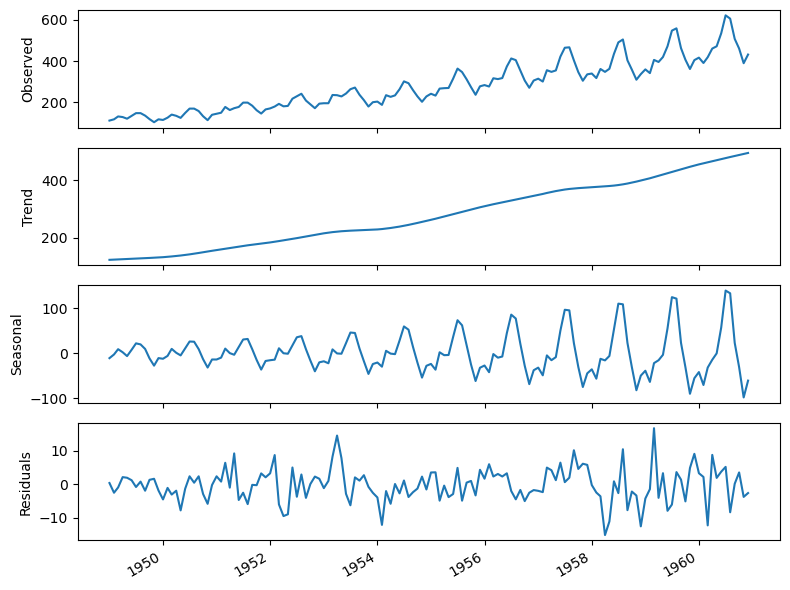

In [48]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8,6))
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
fig.autofmt_xdate()
plt.tight_layout()

__Interpretation:__ 

- The summer months (July and August) usually have the highest numbers of air passengers in one year;
- If we are to forecast the month of July in 1961, the information coming from the month of July in prior years is likely going to be useful, since we can intuitively expect the number of air passengers to be at its highest point in the month of July 1961;
- The parameters $P, D, Q,$ and $m$ allow us to capture that information from the previous seasonal cycle and help us forecast our time series.

### 4.4.2 Forecasting using a SARIMA model

In [49]:
# The result of ADF test show this time series is non-stationary
ad_fuller_result = adfuller(df_ap['Passengers'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060371
p-value: 0.9918802434376408


In [50]:
# The hyperparameter tuning of SARIMA
from typing import Union
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_sarima(endog: Union[pd.Series, list], orders_list:list, m_value:int):
    results = []
    for order in orders_list:
        try:
            train_model = SARIMAX(endog,
                            order=(order[0], order[1], order[2]), 
                            seasonal_order=(order[3], order[4], order[5], m_value),
                            simple_differencing=False).fit(disp=False)
            aic = train_model.aic
            results.append([order[0:3], order[3:], aic])
        except Exception as e:
            # Print or log the exception if needed
            print(f"Error encountered for order {order}: {str(e)}")
            continue

    # Convert results to DataFrame and sort by AIC
    results_df = pd.DataFrame(results, columns=['(p,d,q)','(P,D,Q)', 'AIC'])
    results_df = results_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return results_df

In [51]:
# Set the ranges of parameters
from itertools import product
ps = range(1, 3, 1) 
ds = range(1, 3, 1)
qs = range(0, 3, 1)   

Ps = range(0, 3, 1)
Ds = range(1, 3, 1)
Qs = range(1, 3, 1)
m = 12

SARIMA_order_list = list(product(ps,ds,qs,Ps,Ds,Qs))
print(len(SARIMA_order_list), 'sets of parameters')

144 sets of parameters


In [52]:
# Training and testing set
train = df_ap['Passengers'][:-12]
test = df_ap['Passengers'][-12:]

In [53]:
%%time

import warnings
warnings.filterwarnings('ignore')

SARIMA_result_df = optimize_sarima(train, SARIMA_order_list, 12)

CPU times: user 8min 27s, sys: 36min 41s, total: 45min 9s
Wall time: 3min 26s


In [54]:
# The result df
SARIMA_result_df

(p,d,q)    (P,D,Q)         AIC
0    (1, 1, 0)  (0, 2, 2)  821.076621
1    (1, 1, 0)  (1, 2, 1)  821.936196
2    (1, 1, 0)  (1, 2, 2)  822.749948
3    (1, 1, 1)  (0, 2, 2)  823.075729
4    (2, 1, 0)  (0, 2, 2)  823.075826
..         ...        ...         ...
139  (1, 2, 0)  (2, 1, 1)  943.619463
140  (1, 2, 0)  (0, 1, 1)  944.269492
141  (1, 2, 0)  (1, 1, 1)  944.683859
142  (1, 2, 0)  (0, 1, 2)  945.455596
143  (1, 2, 0)  (2, 1, 2)  948.837702

[144 rows x 3 columns]

In [55]:
# Selecting the optimised parameters for SARIMA
SARIMA_model = SARIMAX(train, order=(1,1,0), seasonal_order=(0,2,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

In [56]:
# The residual analysis for optimised SARIMA, see the interpretation listed in the last section.
SARIMA_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()

In [57]:
# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = SARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 11, 1))

lb_stat  lb_pvalue
1   0.085543   0.769922
2   1.102155   0.576329
3   1.107583   0.775244
4   1.115448   0.891814
5   1.356056   0.929059
6   1.430653   0.963967
7   1.933381   0.963435
8   2.159716   0.975720
9   2.179872   0.988293
10  4.478823   0.923173

In [58]:
# Based on the results from residual analysis and Ljung-Box test, 
# we can use this model to forecast the next 12 months
SARIMA_pred = SARIMA_model_fit.forecast(steps=12)
SARIMA_pred

1960-01-01    420.747917
1960-02-01    399.591752
1960-03-01    463.924229
1960-04-01    452.692909
1960-05-01    476.833522
1960-06-01    541.861481
1960-07-01    617.870838
1960-08-01    629.560407
1960-09-01    523.687525
1960-10-01    464.829134
1960-11-01    414.555779
1960-12-01    456.164695
Freq: MS, Name: predicted_mean, dtype: float64

__Use ARIMA to predict the last 12 months and compare to SARIMA__

In [59]:
# set the ranges of parameters, here we also use the SARIMA-optimised function 
 
ps = range(1, 3, 1) 
ds = range(1, 3, 1)
qs = range(1, 3, 1)   

# Here, we set P,D,Q,m as 0, then build an ARIMA (a SARIMA(p,d,q)(0,0,0)m model is equivalent to an ARIMA(p,d,q) model.)
Ps = [0] 
Ds = [0]
Qs = [0]

ARIMA_order_list = list(product(ps,ds,qs,Ps,Ds,Qs))
print(len(ARIMA_order_list), 'sets of parameters')

8 sets of parameters


In [60]:
%%time
import warnings
warnings.filterwarnings('ignore')
ARIMA_result_df = optimize_sarima(train, ARIMA_order_list, 12)
ARIMA_result_df

CPU times: user 477 ms, sys: 2.14 s, total: 2.62 s
Wall time: 276 ms


(p,d,q)    (P,D,Q)          AIC
0  (2, 1, 2)  (0, 0, 0)  1225.563123
1  (2, 1, 1)  (0, 0, 0)  1246.262247
2  (1, 1, 2)  (0, 0, 0)  1252.973560
3  (1, 2, 2)  (0, 0, 0)  1254.330013
4  (2, 2, 2)  (0, 0, 0)  1254.989551
5  (1, 1, 1)  (0, 0, 0)  1257.035271
6  (2, 2, 1)  (0, 0, 0)  1259.880776
7  (1, 2, 1)  (0, 0, 0)  1263.861736

In [61]:
# Selecting the optimised parameters for ARIMA
ARIMA_model = SARIMAX(train, order=(2,1,2), seasonal_order=(0,0,0,0), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)
# Forecasting next 12 months
ARIMA_pred = ARIMA_model_fit.forecast(steps=12)
ARIMA_pred

1960-01-01    411.312453
1960-02-01    430.812660
1960-03-01    457.433605
1960-04-01    483.661491
1960-05-01    502.616753
1960-06-01    509.821046
1960-07-01    504.207053
1960-08-01    488.158646
1960-09-01    466.639307
1960-10-01    445.702753
1960-11-01    430.821634
1960-12-01    425.487308
Freq: MS, Name: predicted_mean, dtype: float64

__Note: Run the residual for ARIMA and generate the interpretation__

__Comparing the performance for SARIMA and ARIMA__

In [62]:
df_test = pd.DataFrame(test)
df_test['ARIMA_pred'] = ARIMA_pred.values
df_test['SARIMA_pred'] = SARIMA_pred.values

In [63]:
df_test

Passengers  ARIMA_pred  SARIMA_pred
Month                                          
1960-01-01         417  411.312453   420.747917
1960-02-01         391  430.812660   399.591752
1960-03-01         419  457.433605   463.924229
1960-04-01         461  483.661491   452.692909
1960-05-01         472  502.616753   476.833522
1960-06-01         535  509.821046   541.861481
1960-07-01         622  504.207053   617.870838
1960-08-01         606  488.158646   629.560407
1960-09-01         508  466.639307   523.687525
1960-10-01         461  445.702753   464.829134
1960-11-01         390  430.821634   414.555779
1960-12-01         432  425.487308   456.164695

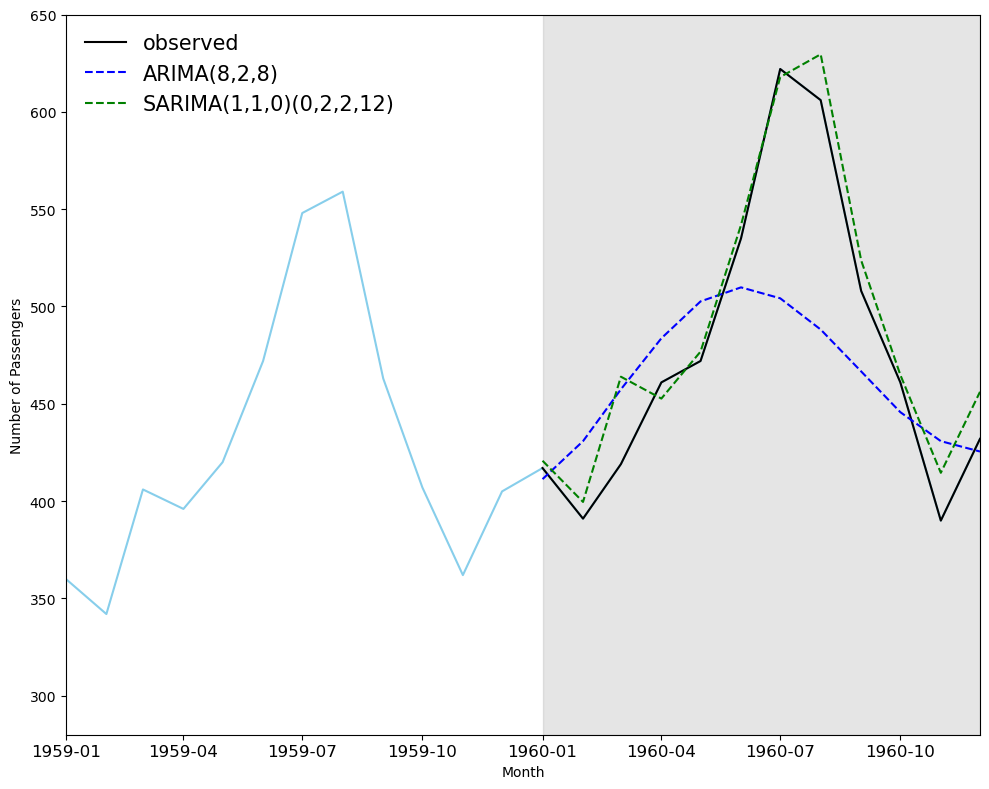

In [64]:
## Plot the prediction plot
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df_ap['Passengers'], 'skyblue')
ax.plot(df_test['Passengers'], 'k-', label='observed')
ax.plot(df_test['ARIMA_pred'], 'b--', label='ARIMA(8,2,8)')
ax.plot(df_test['SARIMA_pred'], 'g--', label='SARIMA(1,1,0)(0,2,2,12)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.axvspan('1960-01', '1960-12', color='#808080', alpha=0.2)
ax.legend(loc=2, fontsize=15, frameon=False)
ax.set_xlim(pd.to_datetime("1959-01-01"), pd.to_datetime("1960-12-01")) 
ax.set_ylim(280, 650)
plt.xticks(fontsize=12, rotation=0)  # Adjust font size and rotation angle
plt.tight_layout()

In [65]:
 # ARIMA Vs SARIMA 
 
# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(test, ARIMA_pred)
mse_sarima = mean_squared_error(test, SARIMA_pred)
print(f"ARIMA MSE : {mse_arima}", 
      f"SARIMA MSE : {mse_sarima}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape_arima = mean_absolute_percentage_error(test, ARIMA_pred)
mape_sarima = mean_absolute_percentage_error(test, SARIMA_pred)
print(f"ARIMA MAPE: {mape_arima}",
      f"SARIMA MAPE: {mape_sarima}")


ARIMA MSE : 3049.5619315115177 SARIMA MSE : 355.44369568087836
ARIMA MAPE: 0.0822049109636542 SARIMA MAPE: 0.031905773447835864


## 4.5 Machine learning models (XGBoost)

In [66]:
# We use the air passenger data as an example
df_ap = pd.read_csv('air-passengers.csv', index_col=0)
# set index to datatime type
df_ap.index = pd.to_datetime(df_ap.index)

In [67]:
df_ap

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

In [68]:
# create a month and generate basic features
df_ap['Month'] = pd.to_datetime(df_ap.index)
df_ap['month'] = df_ap['Month'].dt.month
df_ap['quarter'] = df_ap['Month'].dt.quarter
df_ap['year'] = df_ap['Month'].dt.year
df_ap.drop(columns=['Month'])

Passengers  month  quarter  year
Month                                       
1949-01-01         112      1        1  1949
1949-02-01         118      2        1  1949
1949-03-01         132      3        1  1949
1949-04-01         129      4        2  1949
1949-05-01         121      5        2  1949
...                ...    ...      ...   ...
1960-08-01         606      8        3  1960
1960-09-01         508      9        3  1960
1960-10-01         461     10        4  1960
1960-11-01         390     11        4  1960
1960-12-01         432     12        4  1960

[144 rows x 4 columns]

In [69]:
# create lagged features (shift to right)
for lag in range(1,25):
    df_ap[f'lag_{lag}'] = df_ap['Passengers'].shift(lag).values

In [70]:
df_ap

Passengers      Month  month  quarter  year  lag_1  lag_2  lag_3  \
Month                                                                          
1949-01-01         112 1949-01-01      1        1  1949    NaN    NaN    NaN   
1949-02-01         118 1949-02-01      2        1  1949  112.0    NaN    NaN   
1949-03-01         132 1949-03-01      3        1  1949  118.0  112.0    NaN   
1949-04-01         129 1949-04-01      4        2  1949  132.0  118.0  112.0   
1949-05-01         121 1949-05-01      5        2  1949  129.0  132.0  118.0   
...                ...        ...    ...      ...   ...    ...    ...    ...   
1960-08-01         606 1960-08-01      8        3  1960  622.0  535.0  472.0   
1960-09-01         508 1960-09-01      9        3  1960  606.0  622.0  535.0   
1960-10-01         461 1960-10-01     10        4  1960  508.0  606.0  622.0   
1960-11-01         390 1960-11-01     11        4  1960  461.0  508.0  606.0   
1960-12-01         432 1960-12-01     12        4  1960  390.0  461.0  508.0   

            lag_4  lag_5  ...  lag_15  lag_16  lag_17  lag_18  lag_19  lag_20  \
Month                     ...                                                   
1949-01-01    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1949-02-01    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1949-03-01    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1949-04-01    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1949-05-01  112.0    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
...           ...    ...  ...     ...     ...     ...     ...     ...     ...   
1960-08-01  461.0  419.0  ...   420.0   396.0   406.0   342.0   360.0   337.0   
1960-09-01  472.0  461.0  ...   472.0   420.0   396.0   406.0   342.0   360.0   
1960-10-01  535.0  472.0  ...   548.0   472.0   420.0   396.0   406.0   342.0   
1960-11-01  622.0  535.0  ...   559.0   548.0   472.0   420.0   396.0   406.0   
1960-12-01  606.0  622.0  ...   463.0   559.0   548.0   472.0   420.0   396.0   

            lag_21  lag_22  lag_23  lag_24  
Month                                       
1949-01-01     NaN     NaN     NaN     NaN  
1949-02-01     NaN     NaN     NaN     NaN  
1949-03-01     NaN     NaN     NaN     NaN  
1949-04-01     NaN     NaN     NaN     NaN  
1949-05-01     NaN     NaN     NaN     NaN  
...            ...     ...     ...     ...  
1960-08-01   310.0   359.0   404.0   505.0  
1960-09-01   337.0   310.0   359.0   404.0  
1960-10-01   360.0   337.0   310.0   359.0  
1960-11-01   342.0   360.0   337.0   310.0  
1960-12-01   406.0   342.0   360.0   337.0  

[144 rows x 29 columns]

In [71]:
# Training and testing data set

training_data = df_ap.query('Month < "1960-01-01"')
print(training_data.shape)

testing_data = df_ap.query('Month >= "1960-01-01"')
print(testing_data.shape)

X_train = training_data[['month', 'quarter', 'year']]
y_train = training_data['Passengers']
 
X_test = testing_data[['month', 'quarter', 'year']]
y_test = testing_data['Passengers']

(132, 29)
(12, 29)


In [74]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
 
# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=30)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 5],
    "learning_rate": [0.01],
    "n_estimators": [50, 100],
    "colsample_bytree": [0.3, 0.5]
 }
 
grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

CPU times: user 3.85 s, sys: 3.98 s, total: 7.83 s
Wall time: 962 ms


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=30),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, g...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5],
                         'learning_rate': [0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [75]:
# best params for xgboost
print(grid_search.best_params_)

{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [76]:
# optimised xgboost
best_model = grid_search.best_estimator_

In [79]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
 
def evaluate_model(y_test_list, prediction):
      print(f"MAE: {mean_absolute_error(y_test_list, prediction)}")
      print(f"MSE: {mean_squared_error(y_test_list, prediction)}")
      print(f"MAPE: {mean_absolute_percentage_error(y_test_list, prediction)}")

In [80]:
# Evaluating GridSearch results
XGBOOST_pred = best_model.predict(X_test)
# plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, XGBOOST_pred)

MAE: 166.57080078125
MSE: 31358.1640625
MAPE: 0.33944782614707947


__Further exploration:__

- Why XGBoost performance is worse than SARIMA on this data?
- Any techniques can be used to improve the XGBoost (rolling forecasting, more featuring engineering)?
- Deep learning model (RNN, LSTM, CNN)?
- Bigger Data?